## Importing Necessary Libraries and Dataset

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Splitting MNIST Dataset into Training and Testing Dataset


In [7]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the dataset
X = X_train.astype('float32') / 255.0
X = X.reshape(-1, 28, 28, 1)  # Add the channel dimension (28x28x1)

y = y_train

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (42000, 28, 28, 1)
Testing data shape: (18000, 28, 28, 1)


## Simple LeNet Model

In [9]:
def build_lenet():
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1)),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')  # Output for 10 classes
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


## Simple AlexNet Model

In [14]:
def build_alexnet():
    model = models.Sequential([
        layers.Conv2D(96, (3, 3), strides=1, activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')  # Output for 10 classes
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


## Training the Model(s)

In [15]:
# Build the models
lenet = build_lenet()
alexnet = build_alexnet()

# Training LeNet model
print("Training LeNet model...")
lenet_history = lenet.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Training AlexNet model
print("Training AlexNet model...")
alexnet_history = alexnet.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the models on the test set (30% of the data)
lenet_score = lenet.evaluate(X_test, y_test)
alexnet_score = alexnet.evaluate(X_test, y_test)

print(f"LeNet Test Accuracy: {lenet_score[1]*100:.2f}%")
print(f"AlexNet Test Accuracy: {alexnet_score[1]*100:.2f}%")

Training LeNet model...
Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8081 - loss: 0.6527 - val_accuracy: 0.9411 - val_loss: 0.2050
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9488 - loss: 0.1670 - val_accuracy: 0.9590 - val_loss: 0.1324
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9662 - loss: 0.1106 - val_accuracy: 0.9657 - val_loss: 0.1055
Epoch 4/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9765 - loss: 0.0780 - val_accuracy: 0.9712 - val_loss: 0.0867
Epoch 5/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9827 - loss: 0.0570 - val_accuracy: 0.9748 - val_loss: 0.0745
Training AlexNet model...
Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 145s 271ms/step - accuracy: 0.8122 - loss: 0.5377 - val_accuracy: 0.9774 - val_loss: 0.0733
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 141s 268ms/step - accuracy: 0.9808 - loss: 0.0626 - val_accuracy: 0.9838 - val_loss: 0.0530
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 137s 261ms/ste

## Plot the training and validation accuracy for LeNet

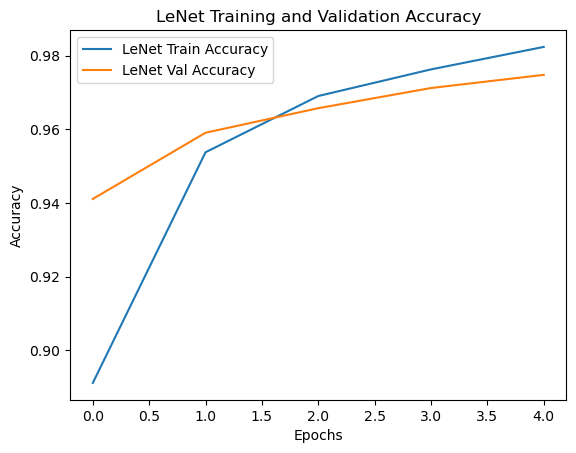

In [18]:
plt.plot(lenet_history.history['accuracy'], label='LeNet Train Accuracy')
plt.plot(lenet_history.history['val_accuracy'], label='LeNet Val Accuracy')
plt.title('LeNet Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## Plot the training and validation accuracy for AlexNet

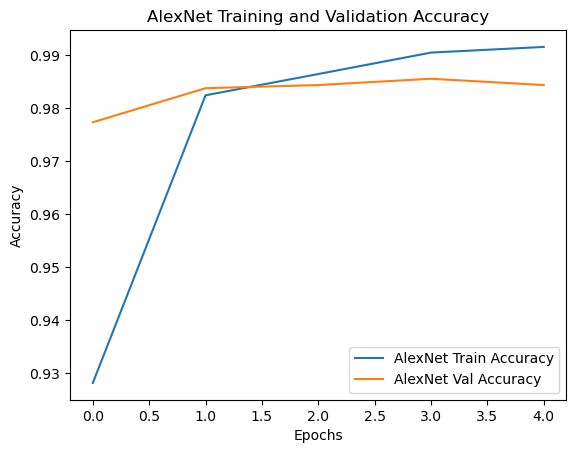

In [19]:
plt.plot(alexnet_history.history['accuracy'], label='AlexNet Train Accuracy')
plt.plot(alexnet_history.history['val_accuracy'], label='AlexNet Val Accuracy')
plt.title('AlexNet Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()